# Well Log plot - Plotly

# Planning


# Solution at (IOT)


# Input
* We choose an oil well with open source to apply visualization methods with python libraries.


# Output
* Jupyter notebook tutorial to analysis

# Tasks
* From https://www.nlog.nl/datacenter 

# Imports

In [1]:
pip install lasio

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express       as px

from plotly.subplots import make_subplots

In [2]:
pwd

'/home/ehgeraldo/repos/Well_Log_Plots'

In [3]:
ls -l

total 19172
-rw-rw-r-- 1 ehgeraldo ehgeraldo   478572 ago 22 14:39 c0.0-ehgeraldo-planning_plots_view.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo    95928 ago 22 22:44 c1.1-ehgeraldo-planning_histogram.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   429306 ago 23 15:52 c2.2-ehgeraldo-planning_scatterplot.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo   395962 ago 24 23:34 c3.3-ehgeraldo-planning_matplolib.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo 18220567 ago 26 23:22 c4.4-ehgeraldo-planning_matplolib.ipynb
drwxrwxr-x 2 ehgeraldo ehgeraldo     4096 ago 26 22:38 data/


In [19]:
df_raw = pd.read_csv('/home/ehgeraldo/repos/Well_Log_Plots/data/xeek_subset_example.csv')

In [20]:
df_raw.reset_index(inplace=True)

In [21]:
df_raw.head()

index     WELL  DEPTH_MD         X_LOC      Y_LOC       Z_LOC  \
0      0  15/9-13   494.528  437641.96875  6470972.5 -469.501831   
1      1  15/9-13   494.680  437641.96875  6470972.5 -469.653809   
2      2  15/9-13   494.832  437641.96875  6470972.5 -469.805786   
3      3  15/9-13   494.984  437641.96875  6470972.5 -469.957794   
4      4  15/9-13   495.136  437641.96875  6470972.5 -470.109772   

          GROUP FORMATION       CALI  RSHA  ...  DTS  DCAL      DRHO  \
0  NORDLAND GP.       NaN  19.480835   NaN  ...  NaN   NaN -0.574928   
1  NORDLAND GP.       NaN  19.468800   NaN  ...  NaN   NaN -0.570188   
2  NORDLAND GP.       NaN  19.468800   NaN  ...  NaN   NaN -0.574245   
3  NORDLAND GP.       NaN  19.459282   NaN  ...  NaN   NaN -0.586315   
4  NORDLAND GP.       NaN  19.453100   NaN  ...  NaN   NaN -0.597914   

   MUDWEIGHT  RMIC  ROPA  RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
0        NaN   NaN   NaN  NaN                             65000   
1        NaN   NaN   NaN  NaN                             65000   
2        NaN   NaN   NaN  NaN                             65000   
3        NaN   NaN   NaN  NaN                             65000   
4        NaN   NaN   NaN  NaN                             65000   

   FORCE_2020_LITHOFACIES_CONFIDENCE   LITH  
0                                1.0  Shale  
1                                1.0  Shale  
2                                1.0  Shale  
3                                1.0  Shale  
4                                1.0  Shale  

[5 rows x 31 columns]

# Data descrition

In [22]:
df1 = df_raw.copy()

## Data dimensions

In [23]:
print('Number of rows: {}'.format(df_raw.shape[0]))
print('Number of cols: {}'.format(df_raw.shape[1]))

Number of rows: 133198
Number of cols: 31


## Data types

In [24]:
df1.dtypes

index                                  int64
WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
SGR                                  float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DTS                                  float64
DCAL      

## Check NAs 

In [25]:
df1.isna().sum()

index                                     0
WELL                                      0
DEPTH_MD                                  0
X_LOC                                  7393
Y_LOC                                  7393
Z_LOC                                  7393
GROUP                                     0
FORMATION                             21566
CALI                                    192
RSHA                                  71159
RMED                                   7642
RDEP                                   7393
RHOB                                  25145
GR                                        0
SGR                                  115848
NPHI                                  41473
PEF                                   32358
DTC                                     563
SP                                    39518
BS                                    35669
ROP                                    2744
DTS                                  121014
DCAL                            

In [26]:
df1.sample().T

26481
index                                      26481
WELL                                     15/9-15
DEPTH_MD                                1733.328
X_LOC                               436812.09375
Y_LOC                                  6462996.0
Z_LOC                               -1708.246216
GROUP                              HORDALAND GP.
FORMATION                             Utsira Fm.
CALI                                   13.448278
RSHA                                    0.914396
RMED                                    0.914396
RDEP                                    0.910235
RHOB                                    2.024888
GR                                      64.29805
SGR                                          NaN
NPHI                                    0.502036
PEF                                     2.501448
DTC                                    138.78183
SP                                     66.976013
BS                                     12.250001
ROP                                    50.403885
DTS                                          NaN
DCAL                                    1.198276
DRHO                                    0.093306
MUDWEIGHT                                 0.1378
RMIC                                         NaN
ROPA                                         NaN
RXO                                     0.599932
FORCE_2020_LITHOFACIES_LITHOLOGY           65000
FORCE_2020_LITHOFACIES_CONFIDENCE            1.0
LITH                                       Shale

## Replace NAs

In [27]:
#df1 = df1.dropna()

In [28]:
#df1.shape

In [29]:
#print('Removed data: {:.2f}%'.format( 1-( df1.shape[0] / df_raw.shape[0] ) ) )

In [30]:
df1.isna().sum()

index                                     0
WELL                                      0
DEPTH_MD                                  0
X_LOC                                  7393
Y_LOC                                  7393
Z_LOC                                  7393
GROUP                                     0
FORMATION                             21566
CALI                                    192
RSHA                                  71159
RMED                                   7642
RDEP                                   7393
RHOB                                  25145
GR                                        0
SGR                                  115848
NPHI                                  41473
PEF                                   32358
DTC                                     563
SP                                    39518
BS                                    35669
ROP                                    2744
DTS                                  121014
DCAL                            

## Data Describe

In [31]:
df1.describe()

index       DEPTH_MD          X_LOC         Y_LOC  \
count  133198.000000  133198.000000  125805.000000  1.258050e+05   
mean    66598.500000    1792.944663  451235.640835  6.471392e+06   
std     38451.094915     739.441515   15299.395264  3.094449e+04   
min         0.000000     415.261599  436790.843750  6.429286e+06   
25%     33299.250000    1182.822400  437640.781250  6.453743e+06   
50%     66598.500000    1747.524495  444152.093750  6.463019e+06   
75%     99897.750000    2413.874901  460442.093750  6.478963e+06   
max    133197.000000    3272.024000  476770.156250  6.539631e+06   

               Z_LOC           CALI          RSHA           RMED  \
count  125805.000000  133006.000000  62039.000000  125556.000000   
mean    -1719.214522      13.199399     10.561825       1.708851   
std       740.536678       3.561386    116.359983       9.127200   
min     -3246.156250       5.946157      0.130193      -0.008419   
25%     -2334.161865      11.381848      0.759227       0.779763   
50%     -1626.893433      12.698571      0.997515       1.095681   
75%     -1119.113525      14.944049      1.450392       1.535653   
max      -375.251495      25.717396   2193.904541    1796.209106   

                RDEP           RHOB  ...            ROP           DTS  \
count  125805.000000  108053.000000  ...  130454.000000  12184.000000   
mean        1.743774       2.199556  ...      28.163816    176.583712   
std        13.233330       0.236902  ...      45.592228     44.358622   
min         0.123068       1.366913  ...       0.018832     93.068260   
25%         0.777323       2.029237  ...       9.650485    149.754013   
50%         1.130621       2.162121  ...      22.362363    162.537949   
75%         1.644573       2.404375  ...      35.444058    190.082294   
max      1856.935059       3.115611  ...    2224.647461    377.327789   

               DCAL           DRHO      MUDWEIGHT         RMIC          ROPA  \
count  56200.000000  105539.000000  101644.000000  1635.000000  13473.000000   
mean       0.972165       0.009307       2.291368     2.568148     25.253839   
std       43.000304       0.067312      17.882420     2.261201     14.319902   
min      -12.215459      -1.795894       0.125818     0.362225      0.556113   
25%        0.007800      -0.007736       0.137800     1.387308     14.260232   
50%        0.415419       0.003215       0.152180     2.133351     24.598738   
75%        1.118416       0.022928       0.168955     2.860770     33.749100   
max    10006.789063       0.433157     185.730927    23.590172     86.378632   

                RXO  FORCE_2020_LITHOFACIES_LITHOLOGY  \
count  38946.000000                     133198.000000   
mean    -112.944168                      63261.582892   
std      333.547482                      13623.352961   
min     -999.900024                      30000.000000   
25%        0.537328                      65000.000000   
50%        0.879455                      65000.000000   
75%        1.519061                      65030.000000   
max     2000.000000                      99000.000000   

       FORCE_2020_LITHOFACIES_CONFIDENCE  
count                      133183.000000  
mean                            1.235796  
std                             0.480781  
min                             1.000000  
25%                             1.000000  
50%                             1.000000  
75%                             1.000000  
max                             3.000000  

[8 rows x 27 columns]

## Descriptive Statistical

In [32]:
num_attributes = df1.select_dtypes('float64')

In [33]:
num_attributes.sample(2)

DEPTH_MD         X_LOC      Y_LOC        Z_LOC      CALI      RSHA  \
45518  1921.141998  438597.21875  6478956.5 -1899.053955  13.51391  0.765162   
38948   922.501998  438591.81250  6478952.5  -900.478455  17.42190       NaN   

          RMED      RDEP      RHOB         GR  ...  BS         ROP  DTS  DCAL  \
45518  0.60587  0.546667  2.046134  52.904945  ... NaN   21.847435  NaN   NaN   
38948  0.69580  0.861158  2.026014  27.036802  ... NaN  217.891617  NaN   NaN   

           DRHO  MUDWEIGHT  RMIC  ROPA       RXO  \
45518 -0.011063   0.141395   NaN   NaN  0.766682   
38948  0.012806   0.133007   NaN   NaN       NaN   

       FORCE_2020_LITHOFACIES_CONFIDENCE  
45518                                1.0  
38948                                1.0  

[2 rows x 25 columns]

## Numerical Attributes

In [34]:
# Central Tendency - Mean, median:

ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame(num_attributes.apply( np.std)).T
d2 = pd.DataFrame(num_attributes.apply( np.min)).T
d3 = pd.DataFrame(num_attributes.apply( np.max)).T
d4 = pd.DataFrame(num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() ) ).T
                  
# Concatenate:
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']

In [35]:
m

attributes           min           max  \
0                            DEPTH_MD  4.152616e+02  3.272024e+03   
1                               X_LOC  4.367908e+05  4.767702e+05   
2                               Y_LOC  6.429286e+06  6.539631e+06   
3                               Z_LOC -3.246156e+03 -3.752515e+02   
4                                CALI  5.946157e+00  2.571740e+01   
5                                RSHA  1.301926e-01  2.193905e+03   
6                                RMED -8.418695e-03  1.796209e+03   
7                                RDEP  1.230677e-01  1.856935e+03   
8                                RHOB  1.366913e+00  3.115611e+00   
9                                  GR  1.092843e-01  8.042990e+02   
10                                SGR -1.968700e+02  1.525168e+02   
11                               NPHI -2.314329e-02  8.173102e-01   
12                                PEF  1.010027e+00  3.655756e+02   
13                                DTC  7.415132e+00  2.304330e+02   
14                                 SP -2.199269e+00  5.265473e+02   
15                                 BS  8.500000e+00  2.600000e+01   
16                                ROP  1.883194e-02  2.224647e+03   
17                                DTS  9.306826e+01  3.773278e+02   
18                               DCAL -1.221546e+01  1.000679e+04   
19                               DRHO -1.795894e+00  4.331570e-01   
20                          MUDWEIGHT  1.258177e-01  1.857309e+02   
21                               RMIC  3.622254e-01  2.359017e+01   
22                               ROPA  5.561134e-01  8.637863e+01   
23                                RXO -9.999000e+02  2.000000e+03   
24  FORCE_2020_LITHOFACIES_CONFIDENCE  1.000000e+00  3.000000e+00   

            range          mean       median           std        skew  \
0     2856.762401  1.792945e+03  1747.524495    739.438740    0.093931   
1    39979.312500  4.512356e+05          NaN  15299.334458    0.638058   
2   110344.500000  6.471392e+06          NaN  30944.363932    0.708930   
3     2870.904755 -1.719215e+03          NaN    740.533735   -0.221370   
4       19.771239  1.319940e+01          NaN      3.561372    0.495462   
5     2193.774348  1.056183e+01          NaN    116.359045   14.561793   
6     1796.217525  1.708851e+00          NaN      9.127164  119.825374   
7     1856.811991  1.743774e+00          NaN     13.233277  104.044125   
8        1.748698  2.199556e+00          NaN      0.236900   -0.120073   
9      804.189666  6.955387e+01    66.266132     39.328581    1.346259   
10     349.386826  5.981314e+01          NaN     25.537933   -0.321064   
11       0.840453  3.556019e-01          NaN      0.143856   -0.297153   
12     364.565565  4.511845e+00          NaN      5.092781   25.347416   
13     223.017821  1.227003e+02          NaN     34.234750   -0.298447   
14     528.746571  9.160892e+01          NaN     98.780876    3.540162   
15      17.500002  1.219454e+01          NaN      3.143394    1.012177   
16    2224.628629  2.816382e+01          NaN     45.592053   22.289747   
17     284.259529  1.765837e+02          NaN     44.356802    1.424776   
18   10019.004522  9.721649e-01          NaN     42.999921  225.729530   
19       2.229051  9.306930e-03          NaN      0.067312   -8.277377   
20     185.605109  2.291368e+00          NaN     17.882332    8.822858   
21      23.227946  2.568148e+00          NaN      2.260509    3.975664   
22      85.822518  2.525384e+01          NaN     14.319371    0.569804   
23    2999.900024 -1.129442e+02          NaN    333.543200   -1.779587   
24       2.000000  1.235796e+00          NaN      0.480779    1.907955   

        kurtosis  
0      -1.105894  
1      -1.230148  
2      -0.541641  
3      -1.048622  
4      -0.137184  
5     223.720361  
6   18574.889372  
7   12601.611440  
8       0.030612  
9      11.784259  
10      3.666799  
11     -1.060910  
12   1174.551144  
13     -1.054025  
14     12.017343  
15 

In [36]:
df1.columns

Index(['index', 'WELL', 'DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP',
       'FORMATION', 'CALI', 'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'SGR',
       'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DTS', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO', 'FORCE_2020_LITHOFACIES_LITHOLOGY',
       'FORCE_2020_LITHOFACIES_CONFIDENCE', 'LITH'],
      dtype='object')

In [37]:
# Take a look of all weel available:

df1.WELL.unique()

array(['15/9-13', '15/9-15', '15/9-17', '16/1-2', '16/1-6 A', '16/10-1',
       '16/10-2', '16/10-3', '16/10-5', '16/11-1 ST3', '16/2-11 A',
       '16/2-16'], dtype=object)

In [38]:
#Choose one well to follow  the analysis

df_well = df1[df1['WELL']=='15/9-15']
df_well

index     WELL  DEPTH_MD         X_LOC      Y_LOC        Z_LOC  \
18270  18270  15/9-15   485.256  436817.90625  6462991.5  -460.255005   
18271  18271  15/9-15   485.408  436817.90625  6462991.5  -460.406982   
18272  18272  15/9-15   485.560  436817.90625  6462991.5  -460.558991   
18273  18273  15/9-15   485.712  436817.90625  6462991.5  -460.710999   
18274  18274  15/9-15   485.864  436817.90625  6462991.5  -460.863007   
...      ...      ...       ...           ...        ...          ...   
35982  35982  15/9-15  3199.520  436790.84375  6463021.0 -3173.941162   
35983  35983  15/9-15  3199.672  436790.84375  6463021.0 -3174.093262   
35984  35984  15/9-15  3199.824  436790.84375  6463021.0 -3174.245117   
35985  35985  15/9-15  3199.976  436790.84375  6463021.0 -3174.397217   
35986  35986  15/9-15  3200.128  436790.84375  6463021.0 -3174.548828   

              GROUP      FORMATION      CALI      RSHA  ...  DTS  \
18270  NORDLAND GP.            NaN       NaN  1.567587  ...  NaN   
18271  NORDLAND GP.            NaN       NaN  1.570050  ...  NaN   
18272  NORDLAND GP.            NaN       NaN  1.553659  ...  NaN   
18273  NORDLAND GP.            NaN       NaN  1.541216  ...  NaN   
18274  NORDLAND GP.            NaN       NaN  1.540456  ...  NaN   
...             ...            ...       ...       ...  ...  ...   
35982     HEGRE GP.  Skagerrak Fm.  7.776711  0.987094  ...  NaN   
35983     HEGRE GP.  Skagerrak Fm.  7.779644  0.969350  ...  NaN   
35984     HEGRE GP.  Skagerrak Fm.  7.792982  0.962780  ...  NaN   
35985     HEGRE GP.  Skagerrak Fm.       NaN  0.973905  ...  NaN   
35986     HEGRE GP.  Skagerrak Fm.       NaN  1.005314  ...  NaN   

               DCAL      DRHO  MUDWEIGHT  RMIC  ROPA         RXO  \
18270           NaN       NaN   0.133007   NaN   NaN -999.900024   
18271           NaN       NaN   0.133007   NaN   NaN -999.900024   
18272           NaN       NaN   0.133007   NaN   NaN -999.900024   
18273           NaN       NaN   0.133007   NaN   NaN -999.900024   
18274           NaN       NaN   0.133007   NaN   NaN -999.900024   
...             ...       ...        ...   ...   ...         ...   
35982     -0.723289 -0.011544   0.191722   NaN   NaN   -7.453425   
35983     -0.720356 -0.012000   0.191722   NaN   NaN   -7.518777   
35984     -0.707018 -0.012083   0.191722   NaN   NaN   -7.584129   
35985   1899.866943 -0.013277   0.191722   NaN   NaN   -7.649461   
35986  10006.789063 -0.018160        NaN   NaN   NaN   -7.714728   

       FORCE_2020_LITHOFACIES_LITHOLOGY  FORCE_2020_LITHOFACIES_CONFIDENCE  \
18270                             65000                                3.0   
18271                             65000                                3.0   
18272                             65000                                3.0   
18273                             65000                                3.0   
18274                             65000                                3.0   
...                                 ...                                ...   
35982                             30000                                1.0   
35983                             30000                                1.0   
35984                             30000                                1.0   
35985                             30000                                NaN   
35986                             30000                                NaN   

            LITH  
18270      Shale  
18271      Shale  
18272      Shale  
18273      Shale  
18274      Shale  
...          ...  
35982  Sandstone  
35983  Sandstone  
35984  Sandstone  
35985  Sandstone  
35986  Sandstone  

[17717 rows x 31 columns]

## 2d Scatter plots

In [39]:
# gamma and depth

px.scatter(df_well, x='GR', y='DEPTH_MD')

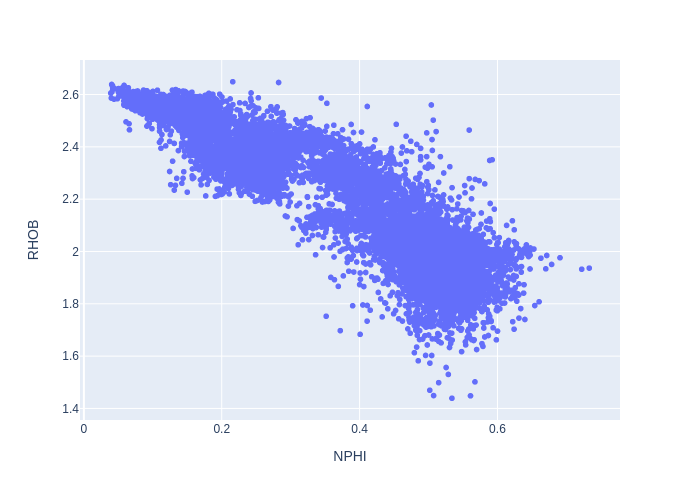

In [44]:
# Neutron porosity, bulk density

fig = px.scatter(df_well, x='NPHI', y='RHOB')
fig.show('png')

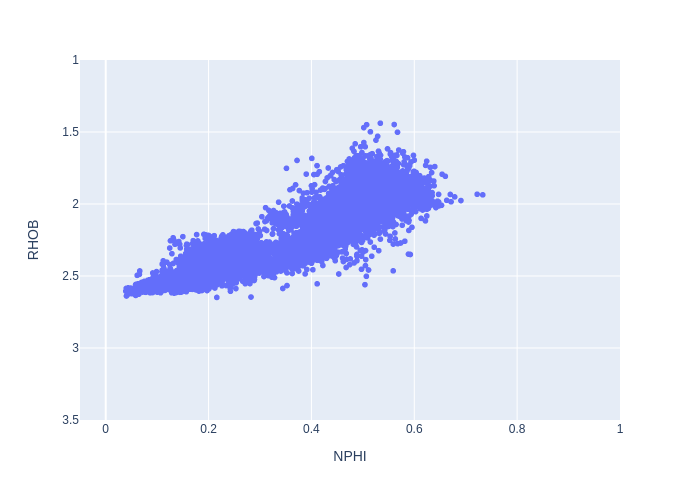

In [45]:
# Neutron porosity, bulk density range selected

fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1])
fig.show('png')

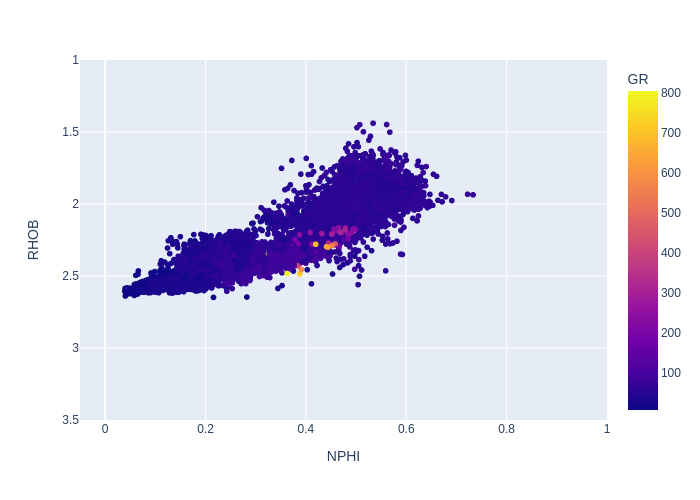

In [46]:
# Neutron porosity, bulk density and gamma

fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1], color='GR')
fig.show('png')

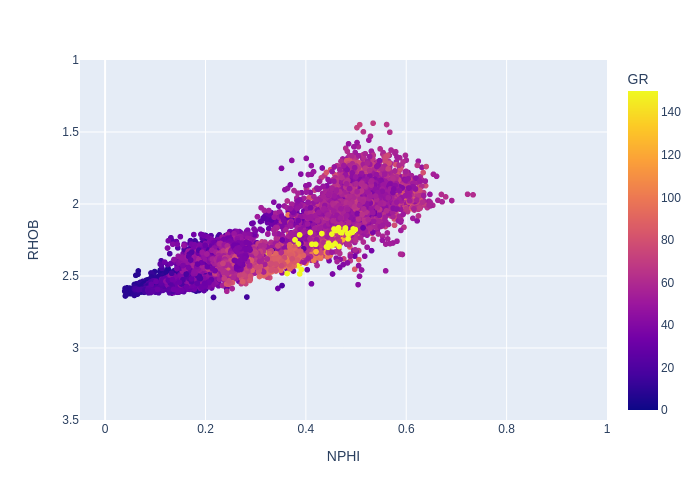

In [47]:
# Gamma range checking

fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1], color='GR', range_color=[0,150])
fig.show('png')

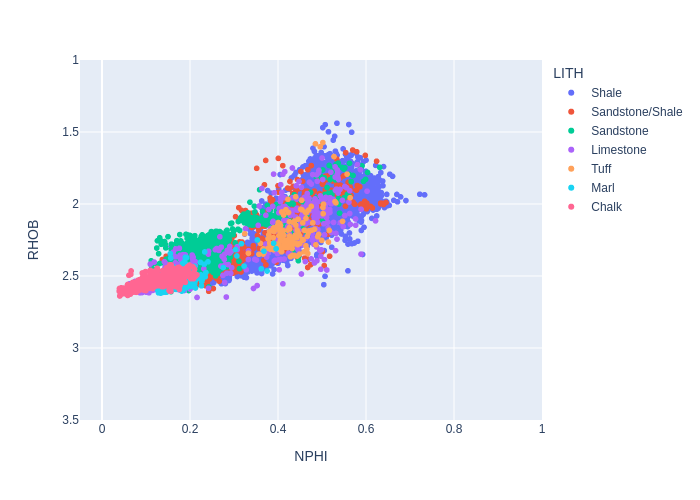

In [48]:
# Lithology adding

fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1], color='LITH')
fig.show('png')

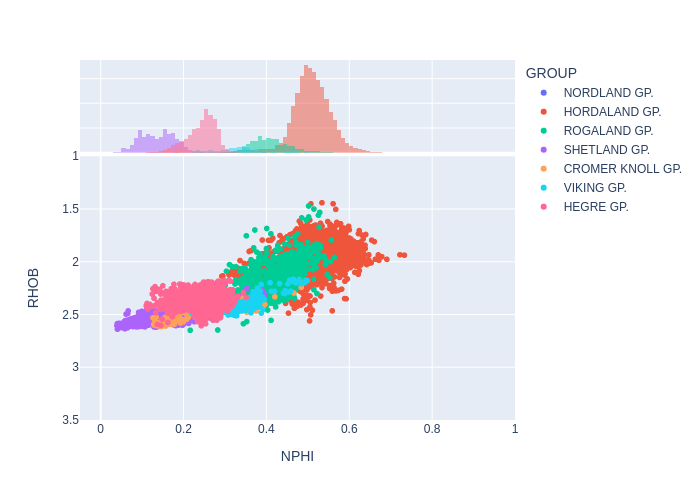

In [49]:
fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1], color='GROUP', marginal_x='histogram')
fig.show('png')

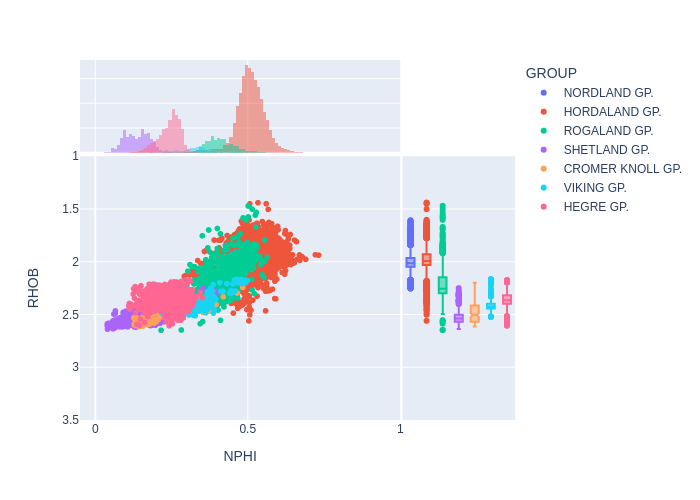

In [50]:
fig = px.scatter(df_well, x='NPHI', y='RHOB', range_x=[-0.05,1], range_y=[3.5, 1], color='GROUP', marginal_x='histogram', marginal_y='box')
fig.show('png')

## 3D Scatter plots

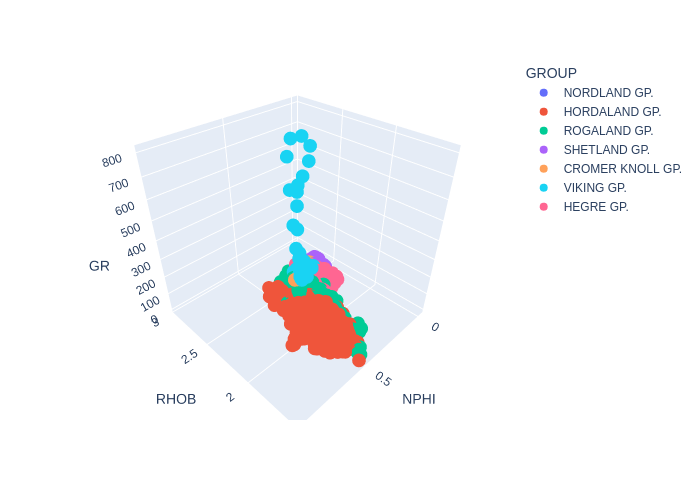

In [51]:
fig = px.scatter_3d(df_well, x='NPHI', y='RHOB', z='GR', range_x=[-0.05,1], range_y=[3,1.5], color='GROUP')
fig.show('png')

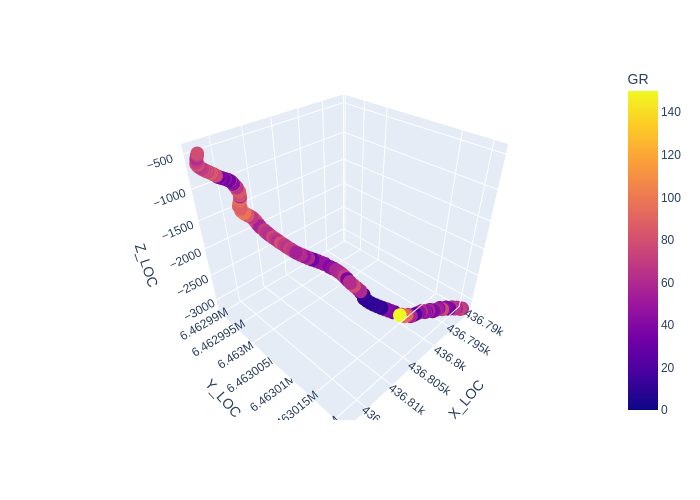

In [52]:
fig = px.scatter_3d(df_well, x='X_LOC', y='Y_LOC', z='Z_LOC', color='GR', range_color=[0,150])
fig.show('png')